# DATA ANALYSIS OF AMAZON'S ECHO REVIEWS 
### (Data set obtained from Kaggle.com)  
@MoisesBarbera  www.github.com/MoisesBarbera
#### A coverage of:
#### ---- Extraction of general information pre-analysis; 
#### ---- Data cleaning;
#### ---- Data imaging/visualization; 
#### ---- Creation of new data sets;
#### ---- Feature engineering

In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [245]:
df_alexa1 = pd.read_csv('amazon_alexa.tsv', sep = '\t')

In [246]:
df_alexa1.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [247]:
df_alexa1.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [248]:
df_alexa1.info() #Obtaining general information about the dataset we are using and checking there is no missing information with non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [249]:
df_alexa1.describe() #displaying other relevant information from the dataset, the number of elemnts on it the values and percentages of the feedback, to know 1 as positive feedback and 0 as negative feedbak. Highlighting the mean on rating since that's the overall opinion of costumers about the product.

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [250]:
df_alexa1.keys() #Obtaining the headers of the specific information provided from the dataset

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [251]:
df_alexa1['verified_reviews'].tail() #Obtaining the reviews from real customers to later on analyse what are their most common opinions on the product

3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, dtype: object

## Cleaning relevant data to guarantee proper analysis

#### On the data provided by "Kaggle.com" for the study of the reviews on the Amazon Echo devices we have spotted a set of data that provides information about the Amazon Fire TV Stick which is not an Alexa eenabled device and hence, every piece of information on the over 3000 rows of data regarding this specific object have to be removed.

In [252]:
df_alexa = df_alexa1[~df_alexa1.variation.str.contains('Fire')]

In [253]:
df_alexa.describe()

,rating,feedback
count,2800.000000,2800.000000
mean,4.447143,0.918214
std,1.076923,0.274087
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


#### As seen, now the data has been reduced in over 300 elements, from 3159 to 2800, ensuring that the visualization of products will be conducted only for those Amazon Echo with alexa enabled. And impotant to reindex afterwards to produce an accurate analysis.

In [254]:
df_alexa = df_alexa.reset_index(drop=True) #This way we reindex the whole dataframe from 0 to 2799 as for all 2800 elements on the dataset.

## Visualisation of data

#### Analysing when have the reviews been written during the week we can obtain information about when is it more common for users to order the product. Considering shipment from Amazon takes as low as 1-2 days and users usually write the review after after 12 hours of use since Amazon keeps track of users satisfaction by asking for reviews by email after 12-24 hours from the product deliery.

In [255]:
df_alexa['date'] = pd.to_datetime(df_alexa['date'], errors='coerce') #Enable access to datetime programming features

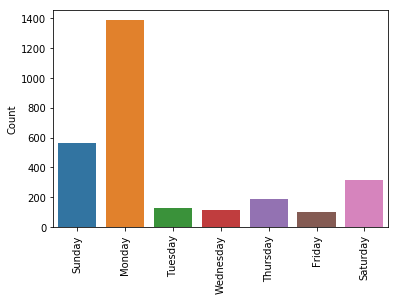

In [256]:
weekday_ratings = df_alexa['date'].dt.weekday_name.value_counts()
weekday_ratings = weekday_ratings.sort_index()
sns.barplot(weekday_ratings.index, weekday_ratings.values, order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.xticks(rotation='vertical')
plt.ylabel('Count')

plt.show()

#### Observing the graph and with the assumption of the majority of reviews been written after 12 hours from delivery we can deduce that most products have been delivered on Monday which implies that the majority of Alexa Echo products were bought during the weekend. This information suggests that there is a marketing action during that period and uses the free time users might have during their weekends as an advantage.

In [257]:
positive = df_alexa[df_alexa['feedback'] == 1] # From "df_alexa" visualise the positive reviews
positive

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,2018-07-31,Charcoal Fabric,Music,1
5,5,2018-07-31,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,2018-07-31,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,2018-07-31,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,2018-07-30,Heather Gray Fabric,looks great,1
9,5,2018-07-30,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [258]:
positive['feedback'].count() #providing the number of positive reviews

2571

In [259]:
negative = df_alexa[df_alexa['feedback'] == 0]  # From "df_alexa" visualise the negative reviews
negative

,rating,date,variation,verified_reviews,feedback
46,2,2018-07-30,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,2018-07-30,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,2018-07-30,Charcoal Fabric,Not much features.,0
162,1,2018-07-30,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,2018-07-30,Heather Gray Fabric,Sad joke. Worthless.,0
187,2,2018-07-29,Charcoal Fabric,Really disappointed Alexa has to be plug-in to...,0
205,2,2018-07-29,Sandstone Fabric,It's got great sound and bass but it doesn't w...,0
233,2,2018-07-29,Sandstone Fabric,I am not super impressed with Alexa. When my P...,0
299,2,2018-07-29,Charcoal Fabric,Too difficult to set up. It keeps timing out ...,0
341,1,2018-07-28,Charcoal Fabric,Alexa hardly came on..,0


In [260]:
negative['feedback'].count() #providing the number of negative reviews

229

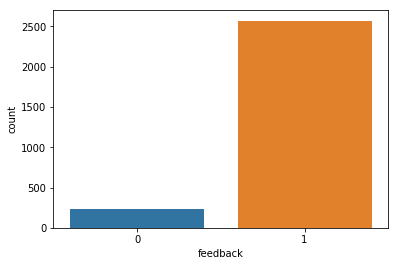

In [261]:
sns.countplot(df_alexa['feedback'], label = 'count') #visualizing how many of those reviews were positive and how many negative. In accordance with our expectations.

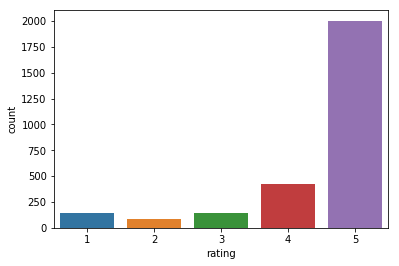

In [262]:
sns.countplot(df_alexa['rating'], label = 'count') #visualizing the satisfaction of the clients though the 5 stars rating

#### Creating a small and easy to do table to find the exact number of counts for each rating.

In [263]:
five_star = df_alexa[df_alexa['rating'] == 5]  
four_star = df_alexa[df_alexa['rating'] == 4]
three_star = df_alexa[df_alexa['rating'] == 3]
two_star = df_alexa[df_alexa['rating'] == 2]
one_star = df_alexa[df_alexa['rating'] == 1]

df_ratings = pd.DataFrame({'rating' : ['5', '4', '3', '2', '1'],
                           'count' : [five_star['rating'].count(), four_star['rating'].count(),
                                      three_star['rating'].count(), two_star['rating'].count(),
                                      one_star['rating'].count()]})
df_ratings

,rating,count
0,5,2004
1,4,421
2,3,146
3,2,81
4,1,148


#### Knowing the number of counts for each rating from the table above we can then obtain their percentage.

In [264]:
print('5 Star Rating = {0} %'.format((2004/2800)*100))
print('4 Star Rating = {0} %'.format((421/2800)*100))
print('3 Star Rating = {0} %'.format((146/2800)*100))
print('2 Star Rating = {0} %'.format((81/2800)*100))
print('1 Star Rating = {0} %'.format((148/2800)*100))

5 Star Rating = 71.57142857142857 %
4 Star Rating = 15.035714285714285 %
3 Star Rating = 5.214285714285714 %
2 Star Rating = 2.892857142857143 %
1 Star Rating = 5.285714285714286 %


#### Since there are several configurations for this product, we can annalyse them to find the most popular ones as well as other features

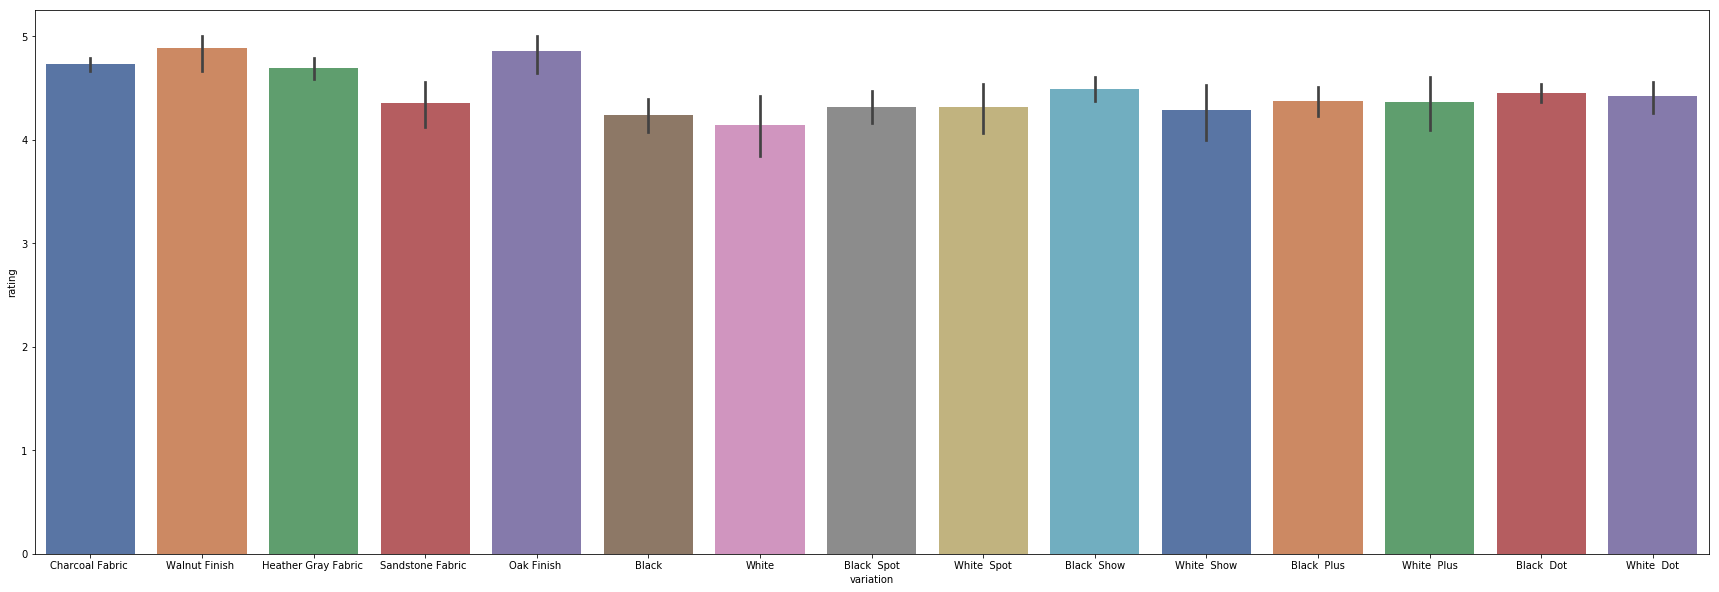

In [265]:
plt.figure(figsize = (30,10))

sns.barplot(x = 'variation', y = 'rating', data = df_alexa, palette = 'deep')

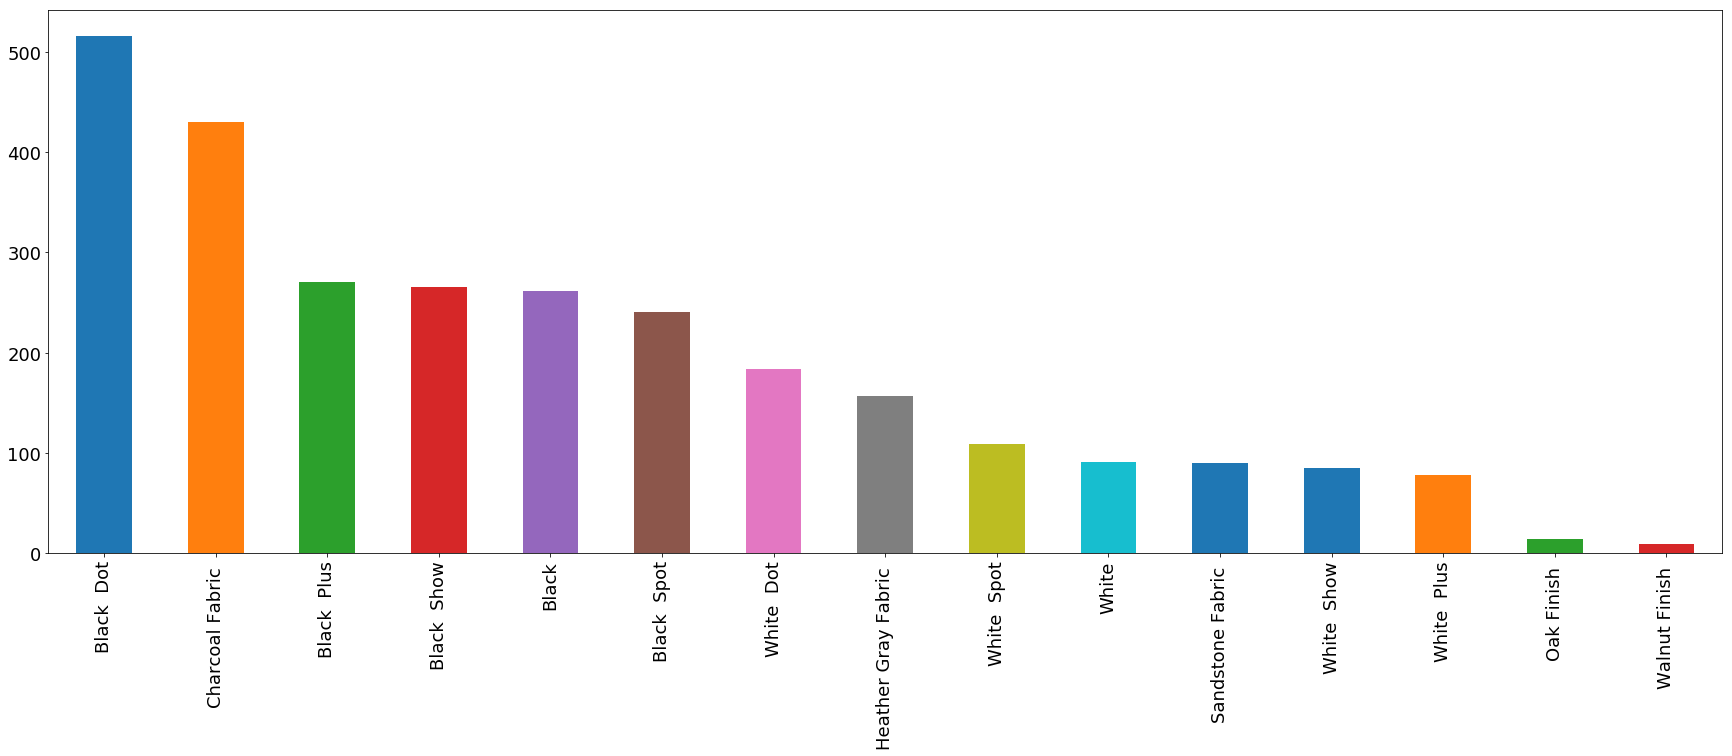

In [266]:
plt.figure(figsize = (30,10))

df_alexa.variation.value_counts().plot(kind='bar', fontsize=18)

#### Knowing the most commonly boght models of this product we can predict the future successful colour options and then produce a range of models and quantities in accordance to that. I would make little sense to produce as many "Walnut Finish" configurations (right hand side of the graph) as "Black Dot" configurations (left hand side of the graph) since the first one barely sold any compared to the Black Dot model which sold over 50 times more units.

### Word Cloud

In [267]:
df_alexa['verified_reviews'].iloc[:5]  #All reviews from real customers on the Amazon echo devices (excluding the already deleted Fire TV stick information) / Only the first 5 elements shown to gain space on desktop (displaying all of them would take longer for the program to upload and would add no useful information) also, improving the comparison with other parts of the code.  

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: verified_reviews, dtype: object

In [268]:
for i in df_alexa['verified_reviews'].iloc[:5]: #A more elegant way to visualize the reviews  / Only the first 5 elements shown to gain space on desktop (displaying all of them would take longer for the program to upload and would add no useful information) also, improving the comparison with other parts of the code.  
    print(i, '\n')

Love my Echo! 

Loved it! 

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. 

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. 

Music 



In [269]:
words = df_alexa['verified_reviews'].tolist() #dataframe selected transformed into different strings
words[:5]  # Only the first 5 elements shown to gain space on desktop (displaying all of them would take longer for the program to upload and would add no useful information) also, improving the comparison with other parts of the code.  

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music']

In [270]:
words_as_one_string = ' '.join(words) #dataframe selected transformed into one single string
words_as_one_string[:500] # Only a certain number of character shown to gain space on desktop (displaying all of them would take longer for the program to upload and would add no useful information) also,  improving the comparison with other parts of the code.  

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessibl'

In [271]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'Averall words used on all reviews')

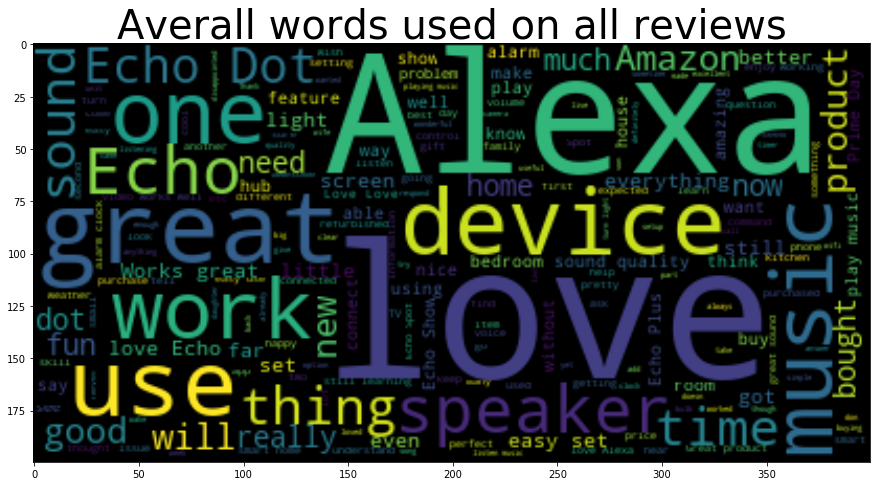

In [272]:
plt.figure(figsize = (15,15))
plt.imshow(WordCloud().generate(words_as_one_string), interpolation = 'bilinear') #interpolation = 'bilinear' increases the quality of the image
plt.title("Averall words used on all reviews", fontsize=40)

#### Now that we know the most commons used by all users of this product, we now want to study those reviews with a bad feedback so the most common wword will be the features to improve and create a better product in the future.

Text(0.5, 1.0, 'Averall words used on negative reviews')

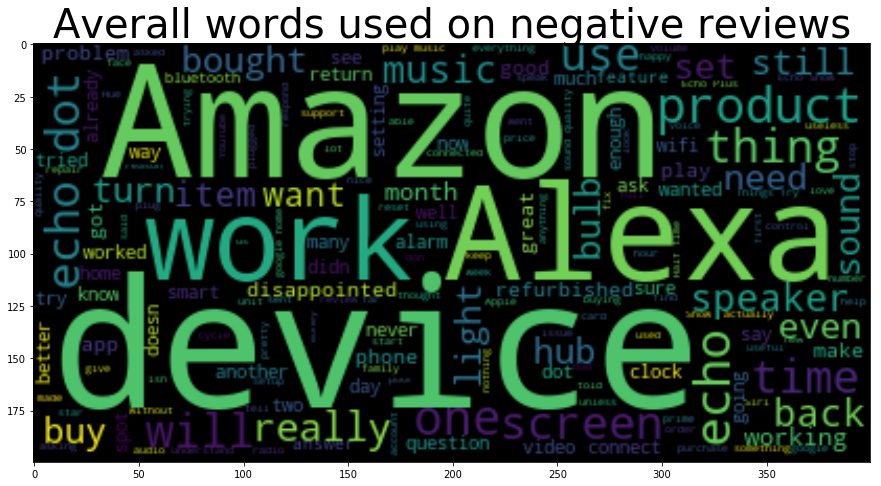

In [273]:
df_bad_alexa = df_alexa[df_alexa['feedback'] == 0] #Creating a dataset with the bad reviews on it only.

bad_words = df_bad_alexa['verified_reviews'].tolist() #dataframe selected transformed into different strings
bad_words_as_one_string = ' '.join(bad_words) #dataframe selected transformed into one single string
plt.figure(figsize = (15,15))
plt.imshow(WordCloud().generate(bad_words_as_one_string), interpolation = 'bilinear')

plt.title("Averall words used on negative reviews", fontsize=40)

#### After neglecting the common words by which the device is refered to as Amazon, Alexa, dot, echo and product; we can see how there is a big enphasis on the words  "speaker", "music" and "sound" suggesting, since these are the negative reviews, there should be an improvement on the speakers of this product to generate a better sound experience for the user.

## Feature Engineering

#### To provide better decisiontaking about the product we want to convert the comments from the audience into words to produce quantitative conclusions.

In [274]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
alexa_CountVectorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])

In [275]:
alexa_CountVectorizer.shape #The reviews are now structured in a structured array.

(2800, 3853)

In [276]:
print(vectorizer.get_feature_names()) #every single word that has been mentioned on the reviews.

['00', '000', '07', '10', '100', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activate', 'activated', 'activates', 'activating', 'actively', '

In [277]:
print(alexa_CountVectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [278]:
word_count_array = alexa_CountVectorizer.toarray()

In [279]:
word_count_array[0,:] #Obtain the first review (first row and all columns)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

'Love my Echo!'

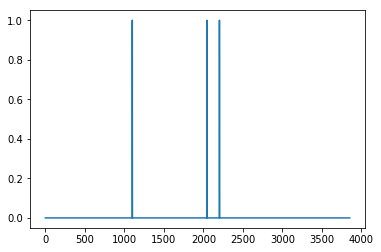

In [280]:
plt.plot(word_count_array[0,:]) #All points are at 0 but three peaks, corresponding to the three words used on this 1st review 
df_alexa['verified_reviews'][0] #displaying the first review on screen to check the 3 words used by this user. 

'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.'

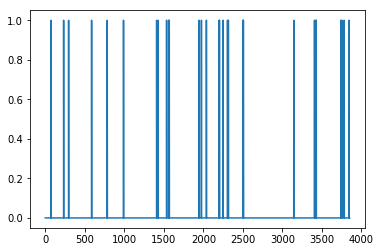

In [281]:
plt.plot(word_count_array[3,:]) #Some points are now at 0 but some peaks appear now, corresponding to the total number of words used on this 4th review 
df_alexa['verified_reviews'][3] #displaying the 4th review on screen to check the words used by this user. 

'Love, Love, Love!!'

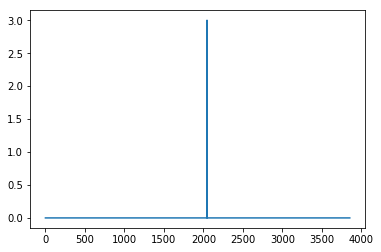

In [282]:
plt.plot(word_count_array[13,:]) #All points are at 0 but 1 peaks, corresponding to the three words used on this 3rd review since it is the same word. 
df_alexa['verified_reviews'][13] #displaying the 3rd review on screen to check the 3 words used by this user, as  they are the same word, only one peak is shown. 

#### Each peak on some position on the x axis corresponds to a word. Always been that word the same for the same peak.

In [283]:
df_alexa['length'] = df_alexa['verified_reviews'].apply(len)
df_alexa.head() #This process gives a value to the total number of charachters used in the description.

,rating,date,variation,verified_reviews,feedback,length
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,13
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,9
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,2018-07-31,Charcoal Fabric,Music,1,5


#### We can use this information of the number of characters each user has used to review the product to also study their level of satisfaction. For instance, happy costumers tend to writte less words than those who are unhappy who usually write longer complaints. 

Text(0, 0.5, 'Users')

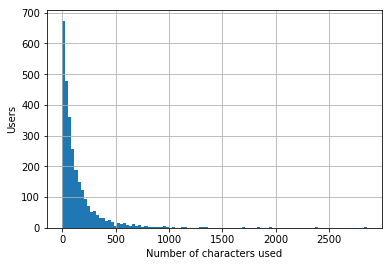

In [284]:
df_alexa['length'].hist(bins = 100) 
plt.xlabel('Number of characters used')
plt.ylabel('Users')

#### The curve shows that a higher number of users have written a shorter number of words to describe the product. Selecting those comments with a maximum number of characters will provide the company more information about what they are doing well and what they are doing bad in order to improve their product while getting an inshight on what they are doing well to keep exploring further on.

In [285]:
min_char = df_alexa['length'].min()
df_alexa[df_alexa['length'] == min_char] ['verified_reviews'].iloc[0]

'😍'

In [286]:
max_char = df_alexa['length'].max()
df_alexa[df_alexa['length'] == max_char] ['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

## Conclusions

#### This analysis has shown relevant data spoing how most of the purchase of this product have been produced on weekends, information that can be used to improve the marketing action on this product as well as the need of enough delivery personel available during that period to deliver the increased amount of requested products on time.  
#### Also, analysing the good and bad reviews we spot the love for this product, with over 70% of five star rating, but there is a need to improve the sound system of the device as it has been the most common word used on negative reviews.
#### The study of the most commonly ordered configurations prepares the company to predict the most succeful color options for the future and act according to this information. Also, knowing the most ordered colours and the less ordered ones can earn money to the company by predicting how many units of each configuration should be produced. In this case, the Black dot option has been a huge success, so this model should be produced in larger quantities compared to the Walnut Finish wich, despite having good reviews, is still the least requested configuration.

#### @MoisesBarbera    www.github.com/MoisesBarbera